In [171]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [132]:
iris = load_iris()

In [134]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [135]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [136]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [137]:
y.value_counts()

target
0         50
1         50
2         50
dtype: int64

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [158]:
clf1 = RandomForestClassifier()
scores = cross_val_score(clf1, X_train, y_train.values.ravel(), cv=5)
print(scores, scores.mean())

clf1.fit(X_train, y_train.values.ravel())

[0.95238095 0.95238095 1.         0.95238095 0.95238095] 0.9619047619047618


RandomForestClassifier()

In [159]:
clf1.score(X_test, y_test)

0.9333333333333333

In [160]:
y_pred1 = clf1.predict(X_test)
class_clf1 = [y_pred1[i] if y_pred1[i] == y_test.values[i] else -1 for i in range(len(y_test))]

In [161]:
draw_clf1 = X_test.copy()
draw_clf1['class_clf1'] = class_clf1

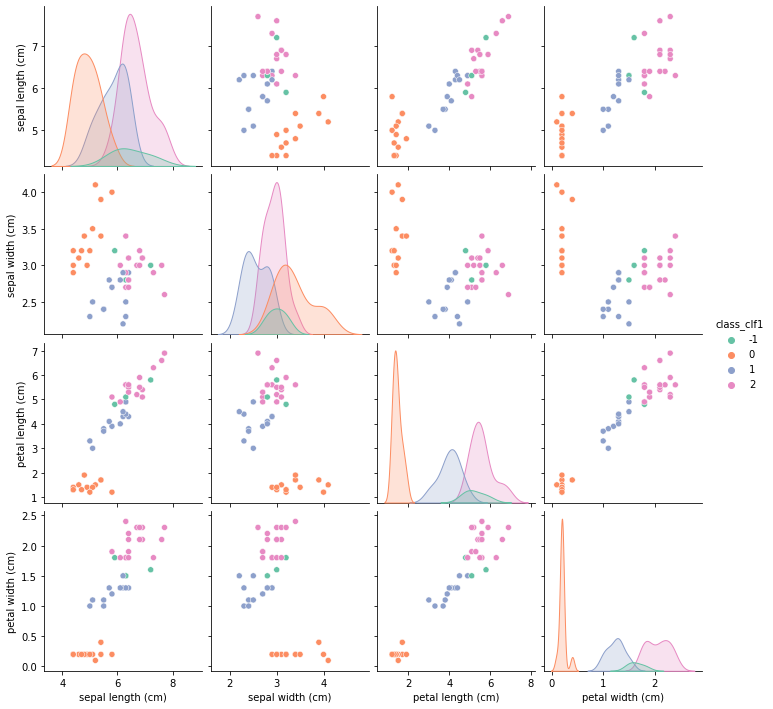

In [163]:
sns.pairplot(draw_clf1, hue = 'class_clf1', palette = 'Set2')

In [165]:
clf2 = ExtraTreesClassifier()
scores = cross_val_score(clf2, X_train, y_train.values.ravel(), cv=5)
print(scores, scores.mean())

clf2.fit(X_train, y_train.values.ravel())

[0.95238095 0.9047619  1.         0.95238095 0.95238095] 0.9523809523809523


ExtraTreesClassifier()

In [166]:
clf2.score(X_test, y_test)

0.9111111111111111

In [167]:
y_pred2 = clf2.predict(X_test)
class_clf2 = [y_pred2[i] if y_pred2[i] == y_test.values[i] else -1 for i in range(len(y_test))]

In [168]:
draw_clf2 = X_test.copy()
draw_clf2['class_clf2'] = class_clf2

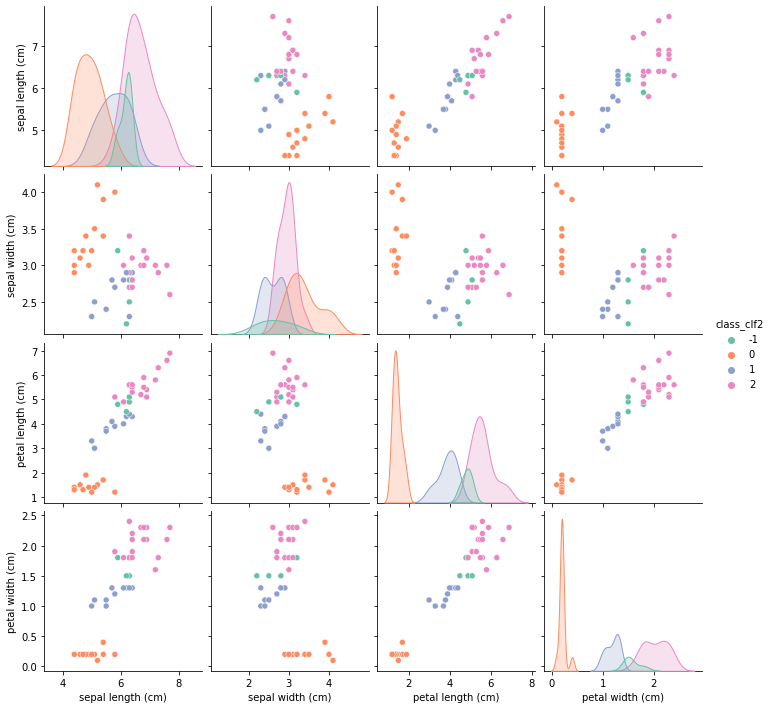

In [169]:
sns.pairplot(draw_clf2, hue = 'class_clf2', palette = 'Set2')

In [173]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf3 = make_pipeline(StandardScaler(), 
                    LinearDiscriminantAnalysis())
scores = cross_val_score(clf3, X_train, y_train.values.ravel(), cv=5)
print(scores, scores.mean())

clf3.fit(X_train, y_train.values.ravel())

[0.95238095 1.         1.         1.         1.        ] 0.9904761904761905


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [174]:
clf3.score(X_test, y_test)

0.9555555555555556

In [175]:
y_pred3 = clf3.predict(X_test)
class_clf3 = [y_pred3[i] if y_pred3[i] == y_test.values[i] else -1 for i in range(len(y_test))]

In [176]:
draw_clf3 = X_test.copy()
draw_clf3['class_clf3'] = class_clf3

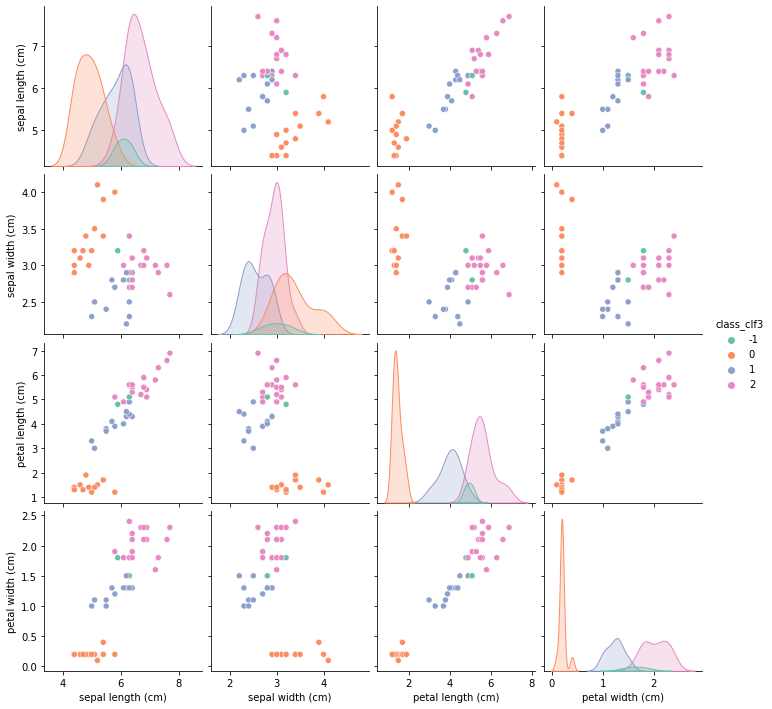

In [177]:
sns.pairplot(draw_clf3, hue = 'class_clf3', palette = 'Set2')